# Customer Segmentation / Clustering

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

## Preprocessing

In [3]:
# Merge datasets on CustomerID
merged_data = pd.merge(customers, transactions, on="CustomerID")

In [4]:
# Convert dates to datetime format
merged_data["SignupDate"] = pd.to_datetime(merged_data["SignupDate"])
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])

## Feature Engineering

In [5]:
# Recency (days since last transaction)
max_date = merged_data["TransactionDate"].max()
merged_data["Recency"] = (max_date - merged_data["TransactionDate"]).dt.days

In [6]:
# Aggregation per CustomerID
grouped = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spend
    "TransactionID": "count",  # Frequency of transactions
    "Recency": "min"  # Minimum recency
}).rename(columns={"TransactionID": "Frequency", "TotalValue": "TotalSpend"}).reset_index()

In [7]:
# Merge with customer profile
final_data = pd.merge(grouped, customers, on="CustomerID")

In [8]:
# Encode categorical features
le = LabelEncoder()
final_data["Region"] = le.fit_transform(final_data["Region"])

In [9]:
# Standardize numerical features
scaler = StandardScaler()
features = ["TotalSpend", "Frequency", "Recency", "Region"]
scaled_data = scaler.fit_transform(final_data[features])

## Clustering with K-Means

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
final_data["Cluster"] = kmeans.fit_predict(scaled_data)

C:\Anaconda\envs\ML_and_DL\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Evaluate Clustering

In [36]:
db_index = davies_bouldin_score(scaled_data, final_data["Cluster"])
silhouette_avg = silhouette_score(scaled_data, final_data["Cluster"])

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.0560199188222816
Silhouette Score: 0.29787315399679065


## Visualization

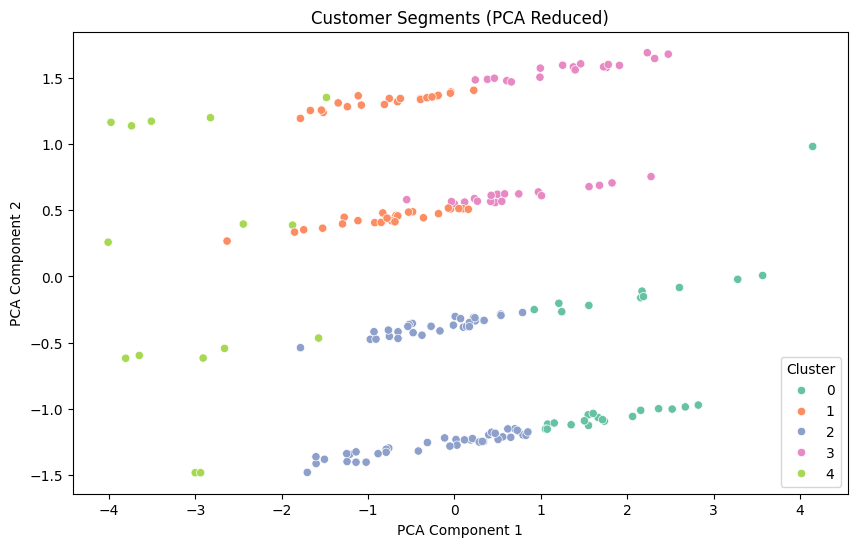

In [30]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=final_data["Cluster"], palette="Set2")
plt.title("Customer Segments (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

-----
---